In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\HeightVsWeight.csv")

In [4]:
df.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [5]:
df.corr()

,Age,Height
Age,1.000000,0.947283
Height,0.947283,1.000000


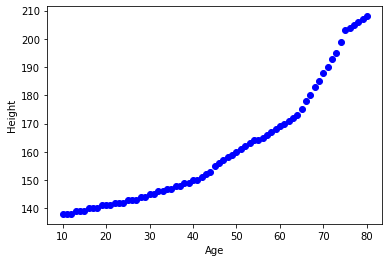

In [7]:
plt.scatter(df.Age, df.Height,  color='blue')
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [11]:
#Linear Regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['Height']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.95660283]]
Intercept:  [117.85254606]


Text(0, 0.5, 'Height')

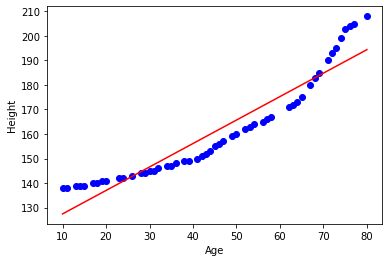

In [12]:
plt.scatter(train.Age, train.Height,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Age")
plt.ylabel("Height")

In [13]:
test_x=np.asanyarray(test[['Age']])
test_y=np.asanyarray(test[['Height']])

In [14]:
accuracy=regr.score(test_x, test_y)
"Accuracy: {}%".format(int(round(accuracy*100)))

'Accuracy: 90%'

In [15]:
#Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['Height']])

test_x = np.asanyarray(test[['Age']])
test_y = np.asanyarray(test[['Height']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000e+00, 1.000e+01, 1.000e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.800e+01, 3.240e+02],
       [1.000e+00, 1.900e+01, 3.610e+02],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 2.600e+01, 6.760e+02],
       [1.000e+00, 2.800e+01, 7.840e+02],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.000e+01, 9.000e+02],
       [1.000e+00, 3.100e+01, 9.610e+02],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 3.400e+01, 1.156e+03],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 3.600e+01, 1.296e+03],
       [1.000e+00, 3.800e+01, 1.444e+03],
       [1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 4.100e+01, 1.681e+03],
       [1.000e+00, 4.200e+01, 1.76

In [17]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.53864014  0.01667346]]
Intercept:  [144.41888244]


Text(0, 0.5, 'Height')

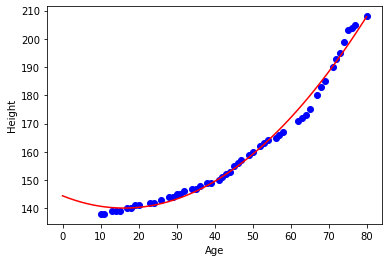

In [24]:
#Using second degree polynomial
plt.scatter(train.Age, train.Height,  color='blue')
XX = np.arange(0.0, 80.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Age")
plt.ylabel("Height")

In [25]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 1.51
Residual sum of squares (MSE): 3.40
R2-score: 0.99


Coefficients:  [[ 0.00000000e+00  6.46792911e-01 -1.39201102e-02  2.29453651e-04]]
Intercept:  [131.9810426]
Mean absolute error: 0.84
Residual sum of squares (MSE): 1.20
R2-score: 1.00


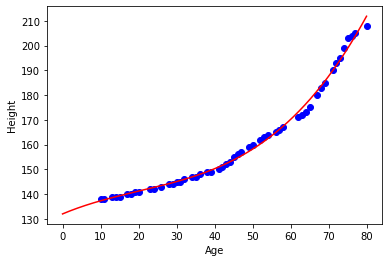

In [27]:
#Using third degree polynomial
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.Age, train.Height,  color='blue')
XX = np.arange(0.0, 80.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Age")
plt.ylabel("Height")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )